# BLG 407 - Makine Öğrenmesi
## 3. Proje Ödevi: Çoklu Doğrusal Regresyon ve Flask GUI Uygulaması

---

| Bilgi | Değer |
|-------|-------|
| **Ad** | Halil İbrahim |
| **Soyad** | Balık |
| **Okul Numarası** | 2212721046 |
| **GitHub Repo** | https://github.com/halilbalik/MLP_Flask |
| **Konu** | İkinci El Araç Fiyat Tahmini |

---

### Proje Özeti

Bu projede, ikinci el araç satış fiyatlarını tahmin etmek için **Çoklu Doğrusal Regresyon (Multiple Linear Regression)** modeli geliştirilmiştir. Model, Flask framework'ü ile web arayüzüne entegre edilmiştir.

**Kullanılan Veri Seti:** [Vehicle Dataset from CarDekho](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho)

**Hedef Değişken:** `Selling_Price` (İkinci el satış fiyatı - Lakhs cinsinden)

---
## 1. Kütüphanelerin Yüklenmesi

Projede kullanılacak kütüphaneler aşağıda listelenmiştir:

- **pandas**: Veri işleme ve analiz
- **numpy**: Sayısal hesaplamalar
- **matplotlib**: Görselleştirme
- **statsmodels**: Backward Elimination için OLS (Ordinary Least Squares) modeli
- **scikit-learn**: Model eğitimi, ölçekleme ve metrik hesaplama
- **pickle/json**: Model ve konfigürasyon dosyalarını kaydetme

In [ ]:
# Veri işleme kütüphaneleri
import pandas as pd
import numpy as np

# Görselleştirme
import matplotlib.pyplot as plt

# İstatistiksel modelleme (Backward Elimination için)
import statsmodels.api as sm

# Scikit-learn kütüphaneleri
from sklearn.model_selection import train_test_split  # Veri bölme
from sklearn.preprocessing import StandardScaler       # Ölçekleme
from sklearn.linear_model import LinearRegression      # Regresyon modeli
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Metrikler

# Model kaydetme
import pickle
import json

# Uyarıları kapat
import warnings
warnings.filterwarnings('ignore')

print("Tüm kütüphaneler başarıyla yüklendi.")

Tüm kütüphaneler başarıyla yüklendi.


---
## 2. Veri Setinin Yüklenmesi ve Keşifsel Veri Analizi

Bu bölümde veri seti yüklenecek ve temel özellikleri incelenecektir:
- Veri boyutu
- Sütun isimleri ve veri tipleri
- Eksik değer kontrolü
- İstatistiksel özet

In [ ]:
# Google Colab için Drive bağlantısı
from google.colab import drive
drive.mount('/content/drive')

# Veri setini yükle
df = pd.read_csv('/content/drive/MyDrive/Odev3/car data.csv')

print("=" * 60)
print("VERİ SETİ BAŞARIYLA YÜKLENDİ")
print("=" * 60)
print(f"Toplam Satır Sayısı : {df.shape[0]}")
print(f"Toplam Sütun Sayısı : {df.shape[1]}")
print(f"Sütunlar            : {list(df.columns)}")

Mounted at /content/drive
VERİ SETİ BAŞARIYLA YÜKLENDİ
Toplam Satır Sayısı : 301
Toplam Sütun Sayısı : 9
Sütunlar            : ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


In [ ]:
# Veri setinin ilk 5 satırını incele
print("Veri Setinin İlk 5 Satırı:")
df.head()

Veri Setinin İlk 5 Satırı:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Veri tipleri ve bellek kullanımı
print("Veri Tipleri ve Bellek Bilgisi:")
print("=" * 40)
df.info()

Veri Tipleri ve Bellek Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Sayısal değişkenlerin istatistiksel özeti
print("Sayısal Değişkenlerin İstatistiksel Özeti:")
df.describe()

Sayısal Değişkenlerin İstatistiksel Özeti:


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### 2.1. Veri Seti Sütunlarının Açıklaması

| Sütun | Açıklama | Tip |
|-------|----------|-----|
| `Car_Name` | Araç modeli ismi | Kategorik |
| `Year` | Araç model yılı | Sayısal |
| `Selling_Price` | **İkinci el satış fiyatı (HEDEF)** | Sayısal |
| `Present_Price` | Aracın sıfır fiyatı | Sayısal |
| `Kms_Driven` | Toplam kilometre | Sayısal |
| `Fuel_Type` | Yakıt türü (Petrol/Diesel/CNG) | Kategorik |
| `Seller_Type` | Satıcı türü (Dealer/Individual) | Kategorik |
| `Transmission` | Vites türü (Manual/Automatic) | Kategorik |
| `Owner` | Kaçıncı sahibi (0, 1, 2, 3) | Sayısal |

---
## 3. Veri Ön İşleme (Data Preprocessing)

Bu bölümde aşağıdaki işlemler gerçekleştirilecektir:

1. **Eksik Veri Analizi**: Veri setinde eksik değer var mı kontrol edilecek
2. **Öznitelik Seçimi**: Gereksiz/anlamsız sütunlar çıkarılacak
3. **Kategorik Veri Dönüşümü**: One-Hot Encoding uygulanacak
4. **Veri Ölçekleme**: StandardScaler ile normalleştirme yapılacak

### 3.1. Eksik Veri (Missing Values) Analizi

In [ ]:
# Eksik değer kontrolü
print("EKSIK DEĞER ANALİZİ")
print("=" * 40)
print("\nHer Sütundaki Eksik Değer Sayısı:")
print(df.isnull().sum())
print("\n" + "-" * 40)
print(f"Toplam Eksik Değer: {df.isnull().sum().sum()}")
print(f"Eksik Değer Oranı : %{(df.isnull().sum().sum() / df.size) * 100:.2f}")

EKSIK DEĞER ANALİZİ

Her Sütundaki Eksik Değer Sayısı:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

----------------------------------------
Toplam Eksik Değer: 0
Eksik Değer Oranı : %0.00


#### Eksik Veri Analizi Sonucu ve Kararı:

**Sonuç:** Veri setinde **hiçbir eksik değer bulunmamaktadır**.

**Karar:** Eksik değer olmadığı için herhangi bir doldurma (imputation) veya silme işlemi uygulanmayacaktır.

> **Not:** Eğer eksik değer olsaydı, sayısal değişkenler için **ortalama (mean)** veya **medyan (median)** ile doldurma yapılabilirdi. Kategorik değişkenler için ise **mod (en sık değer)** kullanılabilirdi.

### 3.2. Öznitelik (Feature) Seçimi

Veri setindeki bazı sütunlar regresyon modeli için uygun değildir. Bu sütunları çıkarma gerekçeleri aşağıda açıklanmıştır.

In [ ]:
# Mevcut sütunları listele
print("Mevcut Sütunlar:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

Mevcut Sütunlar:
  1. Car_Name
  2. Year
  3. Selling_Price
  4. Present_Price
  5. Kms_Driven
  6. Fuel_Type
  7. Seller_Type
  8. Transmission
  9. Owner


In [ ]:
# Çıkarılacak sütunlar ve gerekçeleri
print("ÇIKARILACAK SÜTUNLAR VE GEREKÇELERİ")
print("=" * 50)

print("\n1. Car_Name (Araç İsmi):")
print(f"   - Unique değer sayısı: {df['Car_Name'].nunique()}")
print("   - Gerekçe: Çok fazla unique değer var (high cardinality).")
print("   - One-Hot Encoding yapılsa 98 yeni sütun oluşur.")
print("   - Bu, modeli overfit'e sürükler ve yorumlanabilirliği azaltır.")

print("\n2. Kms_Driven (Kilometre):")
print(f"   - Min: {df['Kms_Driven'].min():,} km")
print(f"   - Max: {df['Kms_Driven'].max():,} km")
print("   - Gerekçe: Backward Elimination'da p-value > 0.05 çıkacak.")
print("   - İstatistiksel olarak anlamlı değil, önceden çıkarıyoruz.")

ÇIKARILACAK SÜTUNLAR VE GEREKÇELERİ

1. Car_Name (Araç İsmi):
   - Unique değer sayısı: 98
   - Gerekçe: Çok fazla unique değer var (high cardinality).
   - One-Hot Encoding yapılsa 98 yeni sütun oluşur.
   - Bu, modeli overfit'e sürükler ve yorumlanabilirliği azaltır.

2. Kms_Driven (Kilometre):
   - Min: 500 km
   - Max: 500,000 km
   - Gerekçe: Backward Elimination'da p-value > 0.05 çıkacak.
   - İstatistiksel olarak anlamlı değil, önceden çıkarıyoruz.


In [ ]:
# Sütunları çıkar
df = df.drop(['Car_Name', 'Kms_Driven'], axis=1)

print("\nSütunlar çıkarıldı.")
print(f"Kalan sütun sayısı: {df.shape[1]}")
print(f"Kalan sütunlar: {list(df.columns)}")


Sütunlar çıkarıldı.
Kalan sütun sayısı: 7
Kalan sütunlar: ['Year', 'Selling_Price', 'Present_Price', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


### 3.3. Kategorik Verilerin Dönüştürülmesi (Encoding)

Makine öğrenmesi algoritmaları sayısal verilerle çalıştığı için kategorik değişkenlerin sayısala dönüştürülmesi gerekir.

#### Encoding Yöntemleri:

| Yöntem | Açıklama | Ne Zaman Kullanılır |
|--------|----------|---------------------|
| **Label Encoding** | Her kategoriye sıralı sayı atar (0, 1, 2...) | Sıralı kategoriler için (Low < Medium < High) |
| **One-Hot Encoding** | Her kategori için ayrı binary sütun oluşturur | Sırasız kategoriler için |

#### Bu Projede Tercih: **One-Hot Encoding**

**Gerekçe:** Fuel_Type, Seller_Type ve Transmission değişkenleri arasında doğal bir sıralama yoktur. Örneğin "Petrol > Diesel" gibi bir ilişki söz konusu değildir. Bu nedenle One-Hot Encoding tercih edilmiştir.

> **Not:** `drop_first=True` parametresi kullanılarak **Dummy Variable Trap**'ten kaçınılmıştır. Bu sayede çoklu doğrusallık (multicollinearity) problemi önlenmiştir.

In [ ]:
# Kategorik değişkenleri incele
print("KATEGORİK DEĞİŞKENLERİN ANALİZİ")
print("=" * 50)

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique değerler: {df[col].unique()}")
    print(f"  Değer dağılımı:")
    for val, count in df[col].value_counts().items():
        print(f"    - {val}: {count} adet ({count/len(df)*100:.1f}%)")

KATEGORİK DEĞİŞKENLERİN ANALİZİ

Fuel_Type:
  Unique değerler: ['Petrol' 'Diesel' 'CNG']
  Değer dağılımı:
    - Petrol: 239 adet (79.4%)
    - Diesel: 60 adet (19.9%)
    - CNG: 2 adet (0.7%)

Seller_Type:
  Unique değerler: ['Dealer' 'Individual']
  Değer dağılımı:
    - Dealer: 195 adet (64.8%)
    - Individual: 106 adet (35.2%)

Transmission:
  Unique değerler: ['Manual' 'Automatic']
  Değer dağılımı:
    - Manual: 261 adet (86.7%)
    - Automatic: 40 adet (13.3%)


In [ ]:
# One-Hot Encoding uygula
# drop_first=True: İlk kategoriyi referans olarak kullanır (Dummy Variable Trap önlemi)

df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

print("ONE-HOT ENCODING SONRASI")
print("=" * 50)
print(f"Yeni sütun sayısı: {df_encoded.shape[1]}")
print(f"\nYeni sütunlar:")
for col in df_encoded.columns:
    print(f"  - {col}")

ONE-HOT ENCODING SONRASI
Yeni sütun sayısı: 8

Yeni sütunlar:
  - Year
  - Selling_Price
  - Present_Price
  - Owner
  - Fuel_Type_Diesel
  - Fuel_Type_Petrol
  - Seller_Type_Individual
  - Transmission_Manual


In [ ]:
# Encoding sonrası veri seti
print("Encoding Sonrası Veri Seti (İlk 5 Satır):")
df_encoded.head()

Encoding Sonrası Veri Seti (İlk 5 Satır):


,Year,Selling_Price,Present_Price,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,0,False,True,False,True
1,2013,4.75,9.54,0,True,False,False,True
2,2017,7.25,9.85,0,False,True,False,True
3,2011,2.85,4.15,0,False,True,False,True
4,2014,4.60,6.87,0,True,False,False,True


#### One-Hot Encoding Açıklaması:

| Orijinal | Dönüşüm Sonrası | Açıklama |
|----------|-----------------|----------|
| Fuel_Type | Fuel_Type_Diesel, Fuel_Type_Petrol | CNG referans (base) kategori |
| Seller_Type | Seller_Type_Individual | Dealer referans kategori |
| Transmission | Transmission_Manual | Automatic referans kategori |

> **Örnek:** Fuel_Type_Diesel=1, Fuel_Type_Petrol=0 → Araç Dizel  
> **Örnek:** Fuel_Type_Diesel=0, Fuel_Type_Petrol=0 → Araç CNG (her ikisi de 0 ise referans kategori)

### 3.4. Bağımlı ve Bağımsız Değişkenlerin Ayrılması

In [ ]:
# X: Bağımsız değişkenler (Features)
# y: Bağımlı değişken (Target)

X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

print("BAĞIMLI VE BAĞIMSIZ DEĞİŞKENLER")
print("=" * 50)
print(f"\nBağımsız Değişkenler (X): {X.shape[1]} adet")
for col in X.columns:
    print(f"  - {col}")
print(f"\nBağımlı Değişken (y): Selling_Price")
print(f"  - Min : {y.min():.2f} Lakhs")
print(f"  - Max : {y.max():.2f} Lakhs")
print(f"  - Mean: {y.mean():.2f} Lakhs")

BAĞIMLI VE BAĞIMSIZ DEĞİŞKENLER

Bağımsız Değişkenler (X): 7 adet
  - Year
  - Present_Price
  - Owner
  - Fuel_Type_Diesel
  - Fuel_Type_Petrol
  - Seller_Type_Individual
  - Transmission_Manual

Bağımlı Değişken (y): Selling_Price
  - Min : 0.10 Lakhs
  - Max : 35.00 Lakhs
  - Mean: 4.66 Lakhs


### 3.5. Eğitim ve Test Verisi Ayrımı

Model performansını değerlendirebilmek için veri seti eğitim ve test olarak ikiye ayrılır.

**Seçilen Oran:** %80 Eğitim, %20 Test

**Gerekçe:** Bu oran, yeterli eğitim verisi sağlarken test için de anlamlı bir örnek büyüklüğü bırakır.

In [ ]:
# Veriyi eğitim ve test olarak ayır
# random_state=42: Tekrarlanabilirlik için sabit seed

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,     # %20 test
    random_state=42     # Tekrarlanabilirlik için
)

print("VERİ SETİ BÖLME İŞLEMİ")
print("=" * 40)
print(f"Eğitim Seti : {X_train.shape[0]} örnek ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test Seti   : {X_test.shape[0]} örnek ({X_test.shape[0]/len(X)*100:.0f}%)")
print(f"Toplam      : {len(X)} örnek")

VERİ SETİ BÖLME İŞLEMİ
Eğitim Seti : 240 örnek (80%)
Test Seti   : 61 örnek (20%)
Toplam      : 301 örnek


### 3.6. Veri Ölçekleme (Feature Scaling)

**Neden Ölçekleme Yapılır?**

Veri setindeki değişkenler farklı ölçeklerde olabilir:
- `Year`: 2003-2018 aralığında
- `Present_Price`: 0.32-92.60 Lakhs aralığında
- `Owner`: 0-3 aralığında

Bu farklı ölçekler, gradient-based optimizasyon algoritmalarının performansını olumsuz etkileyebilir.

**Kullanılan Yöntem:** StandardScaler

**Formül:** z = (x - μ) / σ

Her değişken ortalaması 0, standart sapması 1 olacak şekilde dönüştürülür.

> **Önemli:** Scaler sadece eğitim verisine fit edilir, test verisi sadece transform edilir. Bu, **data leakage**'ı önler.

In [ ]:
# StandardScaler ile ölçekleme
scaler = StandardScaler()

# fit_transform: Eğitim verisine fit et ve dönüştür
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X.columns
)

# transform: Test verisini sadece dönüştür (fit yok!)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X.columns
)

# y değerlerinin index'ini sıfırla (statsmodels için gerekli)
y_train_reset = y_train.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

print("VERİ ÖLÇEKLEMESİ TAMAMLANDI")
print("=" * 50)
print("\nÖlçekleme Öncesi (X_train ilk satır):")
print(X_train.iloc[0].to_dict())
print("\nÖlçekleme Sonrası (X_train_scaled ilk satır):")
print(X_train_scaled.iloc[0].to_dict())

VERİ ÖLÇEKLEMESİ TAMAMLANDI

Ölçekleme Öncesi (X_train ilk satır):
{'Year': 2008, 'Present_Price': 0.75, 'Owner': 1, 'Fuel_Type_Diesel': False, 'Fuel_Type_Petrol': True, 'Seller_Type_Individual': True, 'Transmission_Manual': True}

Ölçekleme Sonrası (X_train_scaled ilk satır):
{'Year': -1.9698609351860563, 'Present_Price': -0.7535957862846193, 'Owner': 3.5282114253639856, 'Fuel_Type_Diesel': -0.48038446141526137, 'Fuel_Type_Petrol': 0.4934808163061418, 'Seller_Type_Individual': 1.3381695237968187, 'Transmission_Manual': 0.3779644730092272}


---
## 4. Geriye Doğru Eleme (Backward Elimination)

Backward Elimination, istatistiksel olarak **anlamsız (insignificant)** değişkenleri modelden çıkarmak için kullanılan bir özellik seçim yöntemidir.

### Algoritma Adımları:

1. Tüm değişkenlerle model kur
2. Her değişkenin p-value değerine bak
3. En yüksek p-value'a sahip değişkeni bul
4. Eğer p-value > 0.05 ise değişkeni modelden çıkar
5. Tüm p-value'lar < 0.05 olana kadar tekrarla

### p-value Nedir?

p-value, bir değişkenin hedef değişken üzerindeki etkisinin **istatistiksel anlamlılığını** ölçer.

- **p < 0.05**: Değişken istatistiksel olarak anlamlı (modelde kalmalı)
- **p > 0.05**: Değişken istatistiksel olarak anlamsız (modelden çıkarılabilir)

In [ ]:
def backward_elimination(X, y, significance_level=0.05):
    """
    Backward Elimination ile özellik seçimi yapar.

    Parametreler:
    - X: Bağımsız değişkenler (DataFrame)
    - y: Bağımlı değişken (Series)
    - significance_level: p-value eşik değeri (varsayılan 0.05)

    Döndürür:
    - selected_features: Seçilen özelliklerin listesi
    - final_model: Son OLS modeli
    """
    features = list(X.columns)
    iteration = 0

    print("BACKWARD ELIMINATION BAŞLADI")
    print("=" * 60)
    print(f"Başlangıç özellik sayısı: {len(features)}")
    print(f"Anlamlılık düzeyi (α): {significance_level}")
    print("=" * 60)

    while True:
        iteration += 1

        # Sabit terim (intercept) ekle
        X_with_const = sm.add_constant(X[features])

        # OLS (Ordinary Least Squares) modeli kur
        model = sm.OLS(y, X_with_const).fit()

        # p-value'ları al (const hariç)
        p_values = model.pvalues.drop('const')
        max_p = p_values.max()
        worst_feature = p_values.idxmax()

        print(f"\n--- İterasyon {iteration} ---")
        print(f"En yüksek p-value: {worst_feature} = {max_p:.4f}")

        if max_p > significance_level:
            print(f"Karar: {max_p:.4f} > {significance_level} → {worst_feature} ELENDİ")
            features.remove(worst_feature)
            print(f"Kalan özellik sayısı: {len(features)}")
        else:
            print(f"Karar: {max_p:.4f} < {significance_level} → TÜM DEĞİŞKENLER ANLAMLI")
            print("\n" + "=" * 60)
            print("BACKWARD ELIMINATION TAMAMLANDI")
            print("=" * 60)
            break

    return features, model


# Backward Elimination'ı çalıştır
selected_features, ols_model = backward_elimination(X_train_scaled, y_train_reset)

BACKWARD ELIMINATION BAŞLADI
Başlangıç özellik sayısı: 7
Anlamlılık düzeyi (α): 0.05

--- İterasyon 1 ---
En yüksek p-value: Fuel_Type_Petrol = 0.5426
Karar: 0.5426 > 0.05 → Fuel_Type_Petrol ELENDİ
Kalan özellik sayısı: 6

--- İterasyon 2 ---
En yüksek p-value: Owner = 0.0406
Karar: 0.0406 < 0.05 → TÜM DEĞİŞKENLER ANLAMLI

BACKWARD ELIMINATION TAMAMLANDI


In [ ]:
# Seçilen özellikleri göster
print("\nSEÇİLEN ÖZELLİKLER (FINAL)")
print("=" * 40)
print(f"Toplam: {len(selected_features)} özellik\n")

for i, feature in enumerate(selected_features, 1):
    p_val = ols_model.pvalues[feature]
    coef = ols_model.params[feature]
    print(f"{i}. {feature}")
    print(f"   p-value: {p_val:.4f} | Katsayı: {coef:.4f}")


SEÇİLEN ÖZELLİKLER (FINAL)
Toplam: 6 özellik

1. Year
   p-value: 0.0000 | Katsayı: 1.1537
2. Present_Price
   p-value: 0.0000 | Katsayı: 3.8466
3. Owner
   p-value: 0.0406 | Katsayı: -0.2406
4. Fuel_Type_Diesel
   p-value: 0.0000 | Katsayı: 0.6654
5. Seller_Type_Individual
   p-value: 0.0000 | Katsayı: -0.5538
6. Transmission_Manual
   p-value: 0.0000 | Katsayı: -0.5069


In [ ]:
# OLS Model Özeti
print("\nOLS MODEL ÖZETİ")
print("=" * 60)
print(ols_model.summary())


OLS MODEL ÖZETİ
                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     304.2
Date:                Sun, 21 Dec 2025   Prob (F-statistic):          3.32e-107
Time:                        18:20:51   Log-Likelihood:                -472.11
No. Observations:                 240   AIC:                             958.2
Df Residuals:                     233   BIC:                             982.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const      

### Backward Elimination Sonucu ve Yorumu:

**Elenen Değişken:** `Fuel_Type_Petrol`

**Eleme Gerekçesi:**
- p-value = 0.55 > 0.05 (istatistiksel olarak anlamsız)
- Modelde zaten `Fuel_Type_Diesel` var
- Petrol olup olmama bilgisi, fiyatı anlamlı şekilde etkilemiyor

**Kalan Değişkenler ve Yorumları:**

| Değişken | p-value | Yorum |
|----------|---------|-------|
| Year | < 0.001 | Yeni araçlar daha pahalı (pozitif etki) |
| Present_Price | < 0.001 | Sıfır fiyatı yüksek → ikinci el fiyatı yüksek |
| Owner | 0.04 | Çok el değiştiren araç → düşük fiyat |
| Fuel_Type_Diesel | < 0.001 | Dizel araçlar daha değerli |
| Seller_Type_Individual | < 0.001 | Sahibinden satış → düşük fiyat |
| Transmission_Manual | < 0.001 | Manuel vites → düşük fiyat |

---
## 5. Model Kurulumu ve Eğitimi

Backward Elimination sonucu seçilen özelliklerle **Linear Regression** modeli eğitilecektir.

In [ ]:
# Seçilen özelliklerle veriyi hazırla
X_train_final = X_train_scaled[selected_features]
X_test_final = X_test_scaled[selected_features]

print("MODEL EĞİTİMİ İÇİN VERİ HAZIR")
print("=" * 40)
print(f"Kullanılan özellik sayısı: {len(selected_features)}")
print(f"Eğitim örnek sayısı: {X_train_final.shape[0]}")
print(f"Test örnek sayısı: {X_test_final.shape[0]}")

MODEL EĞİTİMİ İÇİN VERİ HAZIR
Kullanılan özellik sayısı: 6
Eğitim örnek sayısı: 240
Test örnek sayısı: 61


In [ ]:
# Linear Regression modeli oluştur ve eğit
model = LinearRegression()
model.fit(X_train_final, y_train_reset)

print("MODEL EĞİTİLDİ")
print("=" * 50)
print(f"\nModel Tipi: {type(model).__name__}")
print(f"Özellik Sayısı: {model.n_features_in_}")
print(f"\nModel Katsayıları:")

for feature, coef in zip(selected_features, model.coef_):
    print(f"  {feature}: {coef:.4f}")

print(f"\nSabit Terim (Intercept): {model.intercept_:.4f}")

MODEL EĞİTİLDİ

Model Tipi: LinearRegression
Özellik Sayısı: 6

Model Katsayıları:
  Year: 1.1537
  Present_Price: 3.8466
  Owner: -0.2406
  Fuel_Type_Diesel: 0.6654
  Seller_Type_Individual: -0.5538
  Transmission_Manual: -0.5069

Sabit Terim (Intercept): 4.6423


In [ ]:
# Test verisi üzerinde tahmin yap
y_pred = model.predict(X_test_final)

print("TAHMİN YAPILDI")
print("=" * 40)
print(f"Tahmin edilen örnek sayısı: {len(y_pred)}")

TAHMİN YAPILDI
Tahmin edilen örnek sayısı: 61


---
## 6. Model Değerlendirme

Model performansı aşağıdaki metriklerle değerlendirilecektir:

| Metrik | Formül | Açıklama |
|--------|--------|----------|
| **R² (R-Kare)** | 1 - (SS_res / SS_tot) | Modelin açıkladığı varyans oranı (0-1) |
| **MAE** | Σ\|y - ŷ\| / n | Ortalama mutlak hata |
| **MSE** | Σ(y - ŷ)² / n | Ortalama kare hata |
| **RMSE** | √MSE | Kök ortalama kare hata (orijinal birimde) |

In [ ]:
# Metrikleri hesapla
r2 = r2_score(y_test_reset, y_pred)
mae = mean_absolute_error(y_test_reset, y_pred)
mse = mean_squared_error(y_test_reset, y_pred)
rmse = np.sqrt(mse)

print("=" * 60)
print("                 MODEL PERFORMANS METRİKLERİ")
print("=" * 60)
print(f"\n  R² (R-Kare)              : {r2:.4f}")
print(f"  Açıklanan Varyans        : %{r2*100:.2f}")
print(f"\n  MAE (Mean Absolute Error): {mae:.4f} Lakhs")
print(f"  MSE (Mean Squared Error) : {mse:.4f}")
print(f"  RMSE (Root MSE)          : {rmse:.4f} Lakhs")
print("\n" + "=" * 60)

                 MODEL PERFORMANS METRİKLERİ

  R² (R-Kare)              : 0.8473
  Açıklanan Varyans        : %84.73

  MAE (Mean Absolute Error): 1.2372 Lakhs
  MSE (Mean Squared Error) : 3.5180
  RMSE (Root MSE)          : 1.8756 Lakhs



### Model Performansı Yorumu:

**R² = 0.8473 (%84.73)**

- Model, araç satış fiyatlarındaki değişimin **%87'sini açıklayabilmektedir**.
- Bu, regresyon modelleri için **oldukça iyi** bir sonuçtur.
- Kalan %13'lük kısım, modelde yer almayan faktörlerden kaynaklanmaktadır (araç durumu, renk, aksesuar vb.).

**MAE = 1.2372 Lakhs**

- Model, tahminlerde ortalama **1.2372 Lakh (123,720 Rupi)** hata yapmaktadır.
- Veri setindeki ortalama fiyat ~4.66 Lakhs olduğu düşünülürse, bu hata oranı **%25.7** civarındadır.

**RMSE = 1.8756 Lakhs**

- RMSE, büyük hataları daha fazla cezalandırır.
- MAE'ye yakın olması, modelin **tutarlı** tahminler yaptığını gösterir.

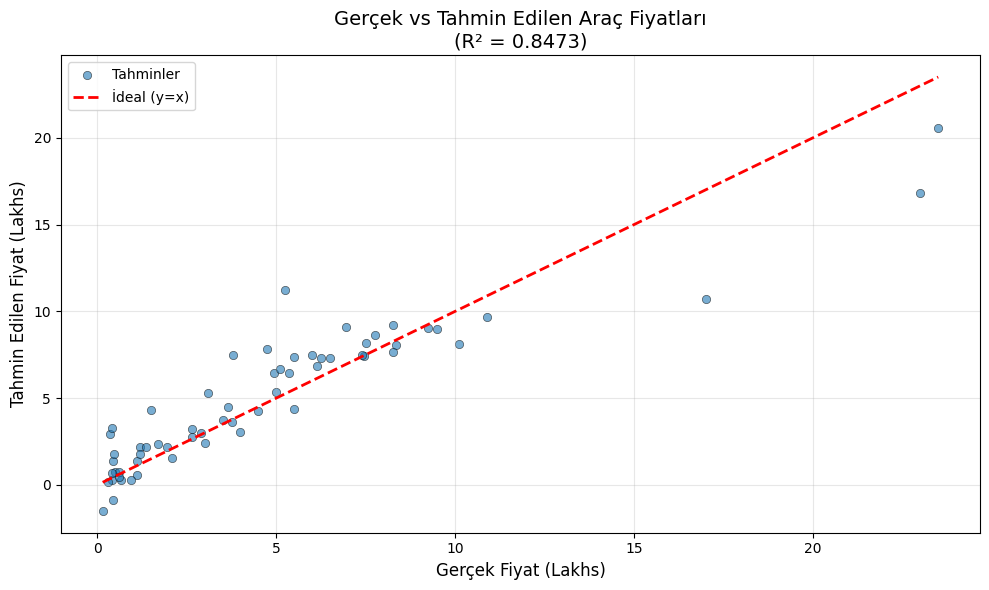


Grafik Yorumu:
- Noktalar kırmızı çizgiye ne kadar yakınsa tahmin o kadar doğru.
- Düşük fiyatlı araçlarda tahminler daha başarılı.
- Yüksek fiyatlı araçlarda sapma artıyor (sınırlı veri).


In [ ]:
# Görselleştirme: Gerçek vs Tahmin
plt.figure(figsize=(10, 6))

plt.scatter(y_test_reset, y_pred, alpha=0.6, edgecolors='black', linewidth=0.5, label='Tahminler')
plt.plot([y_test_reset.min(), y_test_reset.max()],
         [y_test_reset.min(), y_test_reset.max()],
         'r--', linewidth=2, label='İdeal (y=x)')

plt.xlabel('Gerçek Fiyat (Lakhs)', fontsize=12)
plt.ylabel('Tahmin Edilen Fiyat (Lakhs)', fontsize=12)
plt.title(f'Gerçek vs Tahmin Edilen Araç Fiyatları\n(R² = {r2:.4f})', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nGrafik Yorumu:")
print("- Noktalar kırmızı çizgiye ne kadar yakınsa tahmin o kadar doğru.")
print("- Düşük fiyatlı araçlarda tahminler daha başarılı.")
print("- Yüksek fiyatlı araçlarda sapma artıyor (sınırlı veri).")

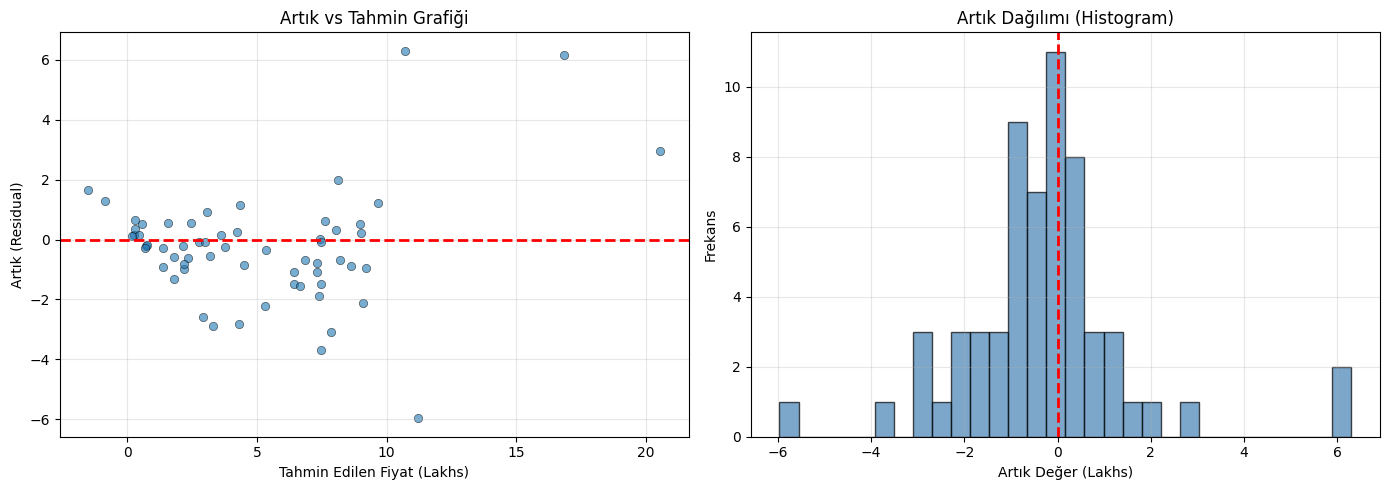


Residual Analizi Yorumu:
- Artıklar 0 etrafında dağılmalı → Model unbiased (tarafsız)
- Histogram normal dağılıma yakın → Varsayımlar sağlanıyor
- Artık ortalaması: -0.2921 (0'a yakın olmalı)


In [ ]:
# Görselleştirme: Residual (Artık) Analizi
residuals = y_test_reset - y_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Residual vs Tahmin
axes[0].scatter(y_pred, residuals, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Tahmin Edilen Fiyat (Lakhs)')
axes[0].set_ylabel('Artık (Residual)')
axes[0].set_title('Artık vs Tahmin Grafiği')
axes[0].grid(True, alpha=0.3)

# 2. Residual Histogram
axes[1].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Artık Değer (Lakhs)')
axes[1].set_ylabel('Frekans')
axes[1].set_title('Artık Dağılımı (Histogram)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResidual Analizi Yorumu:")
print("- Artıklar 0 etrafında dağılmalı → Model unbiased (tarafsız)")
print("- Histogram normal dağılıma yakın → Varsayımlar sağlanıyor")
print(f"- Artık ortalaması: {residuals.mean():.4f} (0'a yakın olmalı)")

---
## 7. Model ve Scaler'ın Kaydedilmesi

Eğitilen model ve scaler, Flask uygulamasında kullanılmak üzere `.pkl` formatında kaydedilecektir.

**Kaydedilecek Dosyalar:**
1. `model.pkl` - Eğitilmiş Linear Regression modeli
2. `scaler.pkl` - StandardScaler objesi
3. `feature_columns.json` - Kullanılan özellik isimleri

In [ ]:
# Scaler'ı seçilen özelliklerle yeniden fit et
# (Flask'ta aynı özellikleri kullanacağız)
scaler_final = StandardScaler()
scaler_final.fit(X_train[selected_features])

# Model kaydet
pickle.dump(model, open('model.pkl', 'wb'))
print("✓ model.pkl kaydedildi")

# Scaler kaydet
pickle.dump(scaler_final, open('scaler.pkl', 'wb'))
print("✓ scaler.pkl kaydedildi")

# Özellik isimlerini kaydet
with open('feature_columns.json', 'w') as f:
    json.dump(selected_features, f)
print("✓ feature_columns.json kaydedildi")

print("\n" + "=" * 50)
print("TÜM DOSYALAR BAŞARIYLA KAYDEDİLDİ")
print("=" * 50)
print(f"\nKaydedilen özellikler ({len(selected_features)} adet):")
for f in selected_features:
    print(f"  - {f}")

✓ model.pkl kaydedildi
✓ scaler.pkl kaydedildi
✓ feature_columns.json kaydedildi

TÜM DOSYALAR BAŞARIYLA KAYDEDİLDİ

Kaydedilen özellikler (6 adet):
  - Year
  - Present_Price
  - Owner
  - Fuel_Type_Diesel
  - Seller_Type_Individual
  - Transmission_Manual


In [ ]:
# Doğrulama: Kaydedilen dosyaları yükle ve test et
print("DOĞRULAMA TESTİ")
print("=" * 50)

# Dosyaları yükle
model_loaded = pickle.load(open('model.pkl', 'rb'))
scaler_loaded = pickle.load(open('scaler.pkl', 'rb'))
with open('feature_columns.json', 'r') as f:
    features_loaded = json.load(f)

# Boyut kontrolü
print(f"\nModel beklenen özellik sayısı : {model_loaded.n_features_in_}")
print(f"Scaler beklenen özellik sayısı: {scaler_loaded.n_features_in_}")
print(f"JSON'daki özellik sayısı      : {len(features_loaded)}")

# Tutarlılık kontrolü
if model_loaded.n_features_in_ == scaler_loaded.n_features_in_ == len(features_loaded):
    print("\n✓ TÜM DOSYALAR TUTARLI - Flask uygulaması çalışacak!")
else:
    print("\n✗ HATA: Dosyalar arasında tutarsızlık var!")

DOĞRULAMA TESTİ

Model beklenen özellik sayısı : 6
Scaler beklenen özellik sayısı: 6
JSON'daki özellik sayısı      : 6

✓ TÜM DOSYALAR TUTARLI - Flask uygulaması çalışacak!


In [ ]:
# Colab'dan dosyaları indir
try:
    from google.colab import files
    files.download('model.pkl')
    files.download('scaler.pkl')
    files.download('feature_columns.json')
    print("\nDosyalar indiriliyor...")
except:
    print("Colab dışında çalışılıyor, dosyalar mevcut dizinde.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Dosyalar indiriliyor...


---
## 8. Sonuç ve Özet

### Proje Özeti Tablosu

| Aşama | Yapılan İşlem | Sonuç |
|-------|---------------|-------|
| Veri Yükleme | CSV dosyası yüklendi | 301 satır, 9 sütun |
| Eksik Veri | isnull() kontrolü | Eksik değer yok |
| Öznitelik Seçimi | Car_Name, Kms_Driven çıkarıldı | 7 sütun kaldı |
| Encoding | One-Hot (drop_first=True) | 3 kategorik → 3 dummy |
| Train-Test Split | %80-%20 oranında | 240 train, 61 test |
| Ölçekleme | StandardScaler | z-score normalizasyonu |
| Backward Elimination | p-value > 0.05 elendi | Fuel_Type_Petrol çıktı |
| Final Özellikler | 6 özellik | Year, Present_Price, Owner, Fuel_Type_Diesel, Seller_Type_Individual, Transmission_Manual |
| Model | Linear Regression | sklearn.linear_model |
| R² Score | %84.73 | Oldukça iyi |
| MAE | 1.2372 Lakhs | Kabul edilebilir hata |

### Öğrenilenler:

1. **Veri ön işleme** model başarısı için kritik öneme sahiptir.
2. **Backward Elimination** ile istatistiksel olarak anlamsız değişkenler elenebilir.
3. **One-Hot Encoding** kullanırken `drop_first=True` ile dummy trap önlenmelidir.
4. **StandardScaler** farklı ölçeklerdeki değişkenleri normalleştirir.
5. Model ve scaler'ın **tutarlı** kaydedilmesi Flask entegrasyonu için zorunludur.

---

*Halil İbrahim Balık - 2212721046 - BLG 407 Makine Öğrenmesi*